In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import scipy.optimize as optimize
from sklearn.metrics import r2_score
import math
import scipy.stats as stats


In [2]:
plt.style.use("default")
plt.rcParams.update({'font.size': 22})

# Test MA selection hypothesis

Does the SureChemBL patent MA results suggest that there is selection for higher-MA compounds?

## Testing

1. Build a scatter plot for a specific MA value (start at 15 because why not) 
- Xaxis: months (starting at Feb 1976)
- Yaxis: log(change in MA=15 values between month & month - 1)

2. Calculate alpha (linear/exponential fit?) for MA=15 scatter plot

3. Extend to other MA values (16-20)

4. Plot MA (xaxis) x alpha (yaxis) plot

5. Extend to all reasonable MA values (5 - 45?)


In [3]:
MA_df = pd.read_csv("Data/AssemblyValues/ALLSAMPLEDcpds_AssemblyGo_COMPLETED.csv")

MA_df.head()

,Unnamed: 0,Unnamed: 0.1,label,MA_assemblyGo,time,earliest_date,date_ordinal
0,3,3,SCHEMBL10000078,10.0,28.798358,2010-03-25,733856
1,4,4,SCHEMBL10000080,6.0,0.351274,2010-03-25,733856
2,12,12,SCHEMBL10000225,8.0,0.005756,2011-10-13,734423
3,13,13,SCHEMBL10000246,8.0,1.418643,2007-03-08,732743
4,14,14,SCHEMBL10000283,6.0,0.718971,2010-01-21,733793


In [4]:
#Find month of each compound - essentially, just remove the last three characters from earliest_date

def get_month(date):
    return date[:-3]

MA_df["month"] = MA_df["earliest_date"].apply(get_month)

In [5]:
print(MA_df)

         Unnamed: 0  Unnamed: 0.1             label  MA_assemblyGo  \
0                 3             3   SCHEMBL10000078           10.0   
1                 4             4   SCHEMBL10000080            6.0   
2                12            12   SCHEMBL10000225            8.0   
3                13            13   SCHEMBL10000246            8.0   
4                14            14   SCHEMBL10000283            6.0   
...             ...           ...               ...            ...   
1529437     3808331       3826690   2022-12_97_full            9.0   
1529438     3808335       3826694  2022-12_973_full           12.0   
1529439     3808342       3826701   2022-12_98_full           11.0   
1529440     3808349       3826708  2022-12_988_full           21.0   
1529441     3808356       3826715  2022-12_994_full           11.0   

               time earliest_date  date_ordinal    month  
0         28.798358    2010-03-25        733856  2010-03  
1          0.351274    2010-03-25        

In [6]:
MA_df = MA_df[MA_df["month"] >= "1976"]

In [148]:
MA15_df = MA_df[MA_df["MA_assemblyGo"] == 40]
MA14_df = MA_df[MA_df["MA_assemblyGo"] == 39]

print(MA15_df)

         Unnamed: 0  Unnamed: 0.1             label  MA_assemblyGo  \
798            1981          2010   SCHEMBL10037606           40.0   
799            1982          2012   SCHEMBL10037608           40.0   
906            2377          2532   SCHEMBL10041332           40.0   
8160          21494         21854   SCHEMBL10301154           40.0   
9237          23961         24353    SCHEMBL1035828           40.0   
...             ...           ...               ...            ...   
1521901     3791582       3809941  2021-07_924_full           40.0   
1522854     3793697       3812056   2021-10_16_full           40.0   
1528543     3806250       3824609  2022-10_852_full           40.0   
1528935     3807014       3825373  2022-11_656_full           40.0   
1528952     3807094       3825453  2022-11_731_full           40.0   

               time earliest_date  date_ordinal    month  
798      123.129881    2010-12-23        734129  2010-12  
799      121.178514    2010-12-23        

In [6]:
MA15_df = MA15_df[MA15_df["month"] < "2020"]
print(MA15_df)

         Unnamed: 0  Unnamed: 0.1                label  MA_assemblyGo  \
40               85            86       SCHEMBL1000181           15.0   
42               87            88      SCHEMBL10001887           15.0   
143             314           318       SCHEMBL1000941           15.0   
271             555           562      SCHEMBL10015743           15.0   
275             569           576      SCHEMBL10015757           15.0   
...             ...           ...                  ...            ...   
1513814     3772650       3791009  2019-12_116975_full           15.0   
1513851     3772761       3791120  2019-12_117087_full           15.0   
1513880     3772845       3791204  2019-12_117172_full           15.0   
1513890     3772904       3791263  2019-12_117232_full           15.0   
1513908     3772959       3791318  2019-12_117287_full           15.0   

               time earliest_date  date_ordinal    month  
40         1.325993    2005-01-06        731952  2005-01  
42   

In [149]:
#Find the number of MA 15 values per month
MA15_counts_df = MA15_df.month.value_counts().reset_index(name="MA 15 Sum")
MA14_counts_df = MA14_df.month.value_counts().reset_index(name="MA 14 Sum")


In [150]:
MA15_counts_df = MA15_counts_df.sort_values(by=["index"])
MA14_counts_df = MA14_counts_df.sort_values(by=["index"])


In [98]:
print(MA15_counts_df)

       index  MA 15 Sum
0    1976-01       1172
5    1976-02        354
3    1976-03        395
2    1976-04        436
1    1976-05        462
..       ...        ...
521  2022-08         35
527  2022-09         33
549  2022-10         23
562  2022-11         15
552  2022-12         22

[564 rows x 2 columns]


In [151]:
MA15_counts_df["cumulative_sum"] = MA15_counts_df["MA 15 Sum"].cumsum()
MA14_counts_df["cumulative_sum"] = MA14_counts_df["MA 14 Sum"].cumsum()


print(MA15_counts_df)

       index  MA 15 Sum  cumulative_sum
178  1976-12          1               1
118  1978-04          1               2
122  1978-07          1               3
113  1979-10          1               4
176  1980-10          1               5
..       ...        ...             ...
96   2022-05          1             415
97   2022-06          1             416
99   2022-08          1             417
179  2022-10          1             418
33   2022-11          3             421

[180 rows x 3 columns]


In [152]:
MA15_counts_df["deltaMA"] = MA15_counts_df['cumulative_sum'] - MA15_counts_df['cumulative_sum'].shift(1)
MA15_counts_df["logDeltaMA"] = np.log(MA15_counts_df["deltaMA"])

MA14_counts_df["logCumSum"] = np.log(MA14_counts_df["cumulative_sum"])

# MA15_counts_df = MA15_counts_df.dropna()
print(MA15_counts_df)
print("-" * 20)
print(MA14_counts_df)

       index  MA 15 Sum  cumulative_sum  deltaMA  logDeltaMA
178  1976-12          1               1      NaN         NaN
118  1978-04          1               2      1.0    0.000000
122  1978-07          1               3      1.0    0.000000
113  1979-10          1               4      1.0    0.000000
176  1980-10          1               5      1.0    0.000000
..       ...        ...             ...      ...         ...
96   2022-05          1             415      1.0    0.000000
97   2022-06          1             416      1.0    0.000000
99   2022-08          1             417      1.0    0.000000
179  2022-10          1             418      1.0    0.000000
33   2022-11          3             421      3.0    1.098612

[180 rows x 5 columns]
--------------------
       index  MA 14 Sum  cumulative_sum  logCumSum
172  1978-07          1               1   0.000000
164  1978-12          1               2   0.693147
165  1980-01          1               3   1.098612
166  1982-08       

In [153]:
#Merge MA15 & MA14 on months

MA_df_testMerge = pd.merge(MA15_counts_df, MA14_counts_df, on="index")
MA_df_testMerge = MA_df_testMerge.dropna()
print(MA_df_testMerge)

       index  MA 15 Sum  cumulative_sum_x  deltaMA  logDeltaMA  MA 14 Sum  \
0    1978-07          1                 3      1.0    0.000000          1   
1    1985-03          1                 9      1.0    0.000000          1   
2    1988-12          1                16      1.0    0.000000          1   
3    1989-11          1                17      1.0    0.000000          1   
4    1990-04          1                19      1.0    0.000000          1   
..       ...        ...               ...      ...         ...        ...   
121  2022-01          1               414      1.0    0.000000          1   
122  2022-05          1               415      1.0    0.000000          1   
123  2022-06          1               416      1.0    0.000000          2   
124  2022-08          1               417      1.0    0.000000          1   
125  2022-11          3               421      3.0    1.098612          3   

     cumulative_sum_y  logCumSum  
0                   1   0.000000  
1    

In [14]:
## Calculate alpha
np.polyfit(np.log(x), y, 1)

NameError: name 'x' is not defined

In [15]:
## Attempt to fit alpha (scipy style)
scipy_fit = optimize.curve_fit(lambda t,a,b: a+b*t, MA15_counts_df["cumulative_sum"],  MA15_counts_df["logDeltaMA"], p0=(5, 0.00001))[0]
print(scipy_fit)

scipy_r2 = r2_score(MA15_counts_df["logDeltaMA"], scipy_fit[0] + MA15_counts_df["cumulative_sum"]*scipy_fit[1])
print(scipy_r2)


[3.90132011e+00 2.43123546e-05]
0.27898428937317776


In [16]:
## Attempt to fit alpha (numpy style)

np_fit = np.polyfit(MA15_counts_df["cumulative_sum"], np.log(MA15_counts_df["deltaMA"]), 1, w=np.sqrt(MA15_counts_df["deltaMA"]))
print(np_fit)

np_r2 = r2_score(MA15_counts_df["logDeltaMA"], np_fit[1] + MA15_counts_df["cumulative_sum"]*np_fit[0])
print(np_r2)

[2.08426194e-05 4.19702265e+00]
0.1895557822718814


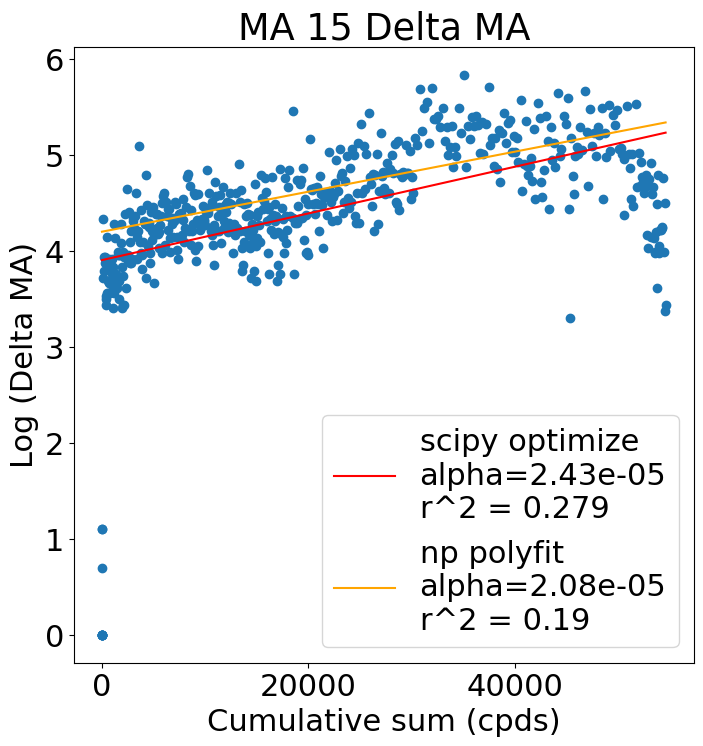

In [20]:
plt.figure(figsize=(8,8))

plt.scatter(MA14_counts_df["cumulative_sum"], MA15_counts_df["logDeltaMA"])

plt.plot(MA15_counts_df["cumulative_sum"], scipy_fit[0] + MA15_counts_df["cumulative_sum"]*scipy_fit[1], 
    color="red", label=f"scipy optimize\nalpha={round(scipy_fit[1],7)}\nr^2 = {round(scipy_r2,3)}")

plt.plot(MA15_counts_df["cumulative_sum"], np_fit[1] + MA15_counts_df["cumulative_sum"]*np_fit[0], 
    color="orange", label=f"np polyfit\nalpha={round(np_fit[0],7)}\nr^2 = {round(np_r2,3)}")


plt.xlabel("Cumulative sum (cpds)")
plt.ylabel("Log (Delta MA)")
plt.title("MA 15 Delta MA")
plt.legend()

In [40]:
print(MA_df_testMerge)

       index  MA 15 Sum  cumulative_sum_x  deltaMA  logDeltaMA  MA 14 Sum  \
1    1973-10          2                 6      2.0    0.693147          1   
2    1974-12          3                13      3.0    1.098612          4   
3    1975-10          1                16      1.0    0.000000          3   
4    1976-01         76                92     76.0    4.330733        135   
5    1976-02         41               133     41.0    3.713572         81   
..       ...        ...               ...      ...         ...        ...   
563  2022-08         21             55953     21.0    3.044522         39   
564  2022-09         24             55977     24.0    3.178054         26   
565  2022-10         21             55998     21.0    3.044522         32   
566  2022-11         12             56010     12.0    2.484907         17   
567  2022-12         25             56035     25.0    3.218876         35   

     cumulative_sum_y  logCumSum  
1                   7   1.945910  
2    

In [154]:
#Attempt #3 for alpha - linear regression over log/log data

stats_fit = stats.linregress(MA_df_testMerge["logCumSum"], MA_df_testMerge["logDeltaMA"])
print(stats_fit)
print(stats_fit[0])


LinregressResult(slope=0.20202966870184352, intercept=-0.3231229585565192, rvalue=0.2707251022463354, pvalue=0.0021689684417307373, stderr=0.06451299728843263, intercept_stderr=0.3399356136887516)
0.20202966870184352


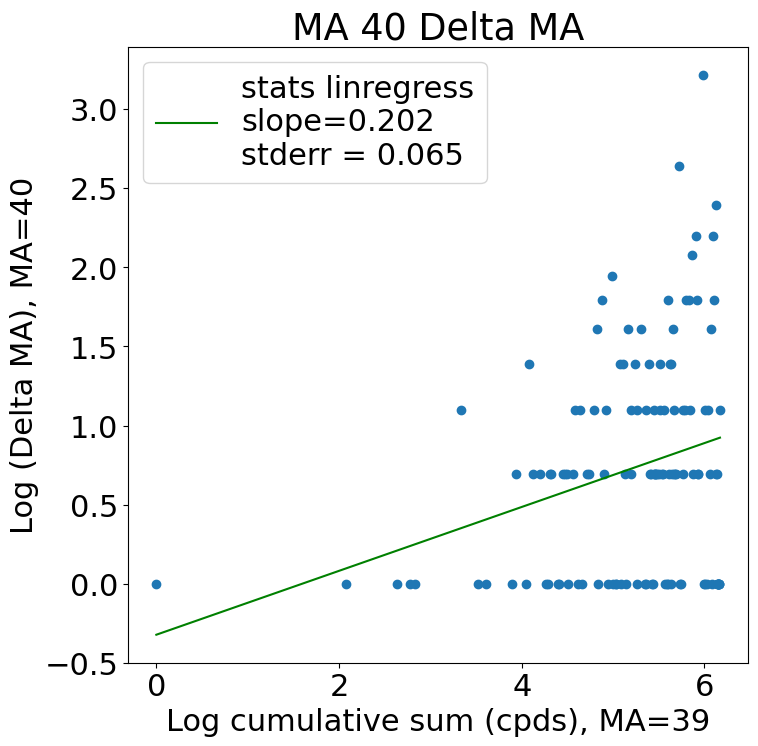

In [156]:
plt.figure(figsize=(8,8))

plt.scatter(MA_df_testMerge["logCumSum"], MA_df_testMerge["logDeltaMA"])

plt.plot(MA_df_testMerge["logCumSum"], stats_fit[1] + MA_df_testMerge["logCumSum"]*stats_fit[0], 
    color="green", label=f"stats linregress\nslope={round(stats_fit[0],3)}\nstderr = {round(stats_fit[4],3)}")



plt.xlabel("Log cumulative sum (cpds), MA=39")
plt.ylabel("Log (Delta MA), MA=40")
plt.title("MA 40 Delta MA")
plt.legend()

In [62]:
print(4.04975441 + np.exp(MA15_counts_df["cumulative_sum"]*1.34622178e-05))

565    5.049808
566    5.049835
571    5.049849
572    5.049862
568    5.049876
         ...   
557    6.173649
550    6.174335
554    6.174936
563    6.175279
548    6.175995
Name: cumulative_sum, Length: 574, dtype: float64


Text(0.5, 1.0, 'MA 15 Delta MA')

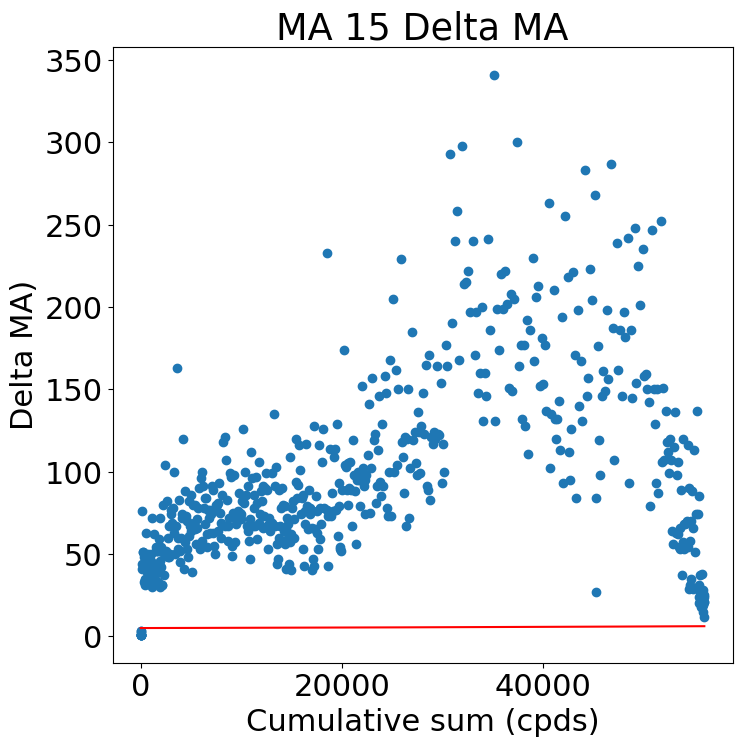

In [61]:
plt.figure(figsize=(8,8))

plt.scatter(MA15_counts_df["cumulative_sum"], MA15_counts_df["deltaMA"])

plt.xlabel("Cumulative sum (cpds)")
plt.ylabel("Delta MA)")
plt.title("MA 15 Delta MA")

## Automated version

Over a range of MA values (3-40, arbitrarily), find alpha from np.polyfit & np.linregress with log/log data, and graph this over MA values

In [8]:
def get_specific_MA_df(MA_df, value):
    return MA_df[MA_df["MA_assemblyGo"] == value]

def get_alpha(sub_df):
    np_fit = np.polyfit(sub_df["cumulative_sum"], np.log(sub_df["deltaMA"]), 1, w=np.sqrt(sub_df["deltaMA"]))
    return np_fit[0]

def get_loglog_slope(sub_df_merged):
    stats_fit = stats.linregress(sub_df_merged["logCumSum"], sub_df_merged["logDeltaMA"])
    return stats_fit

In [190]:
# plt.figure(figsize=(8,8))

alphas = []
loglog_slopes = []
loglog_rvalues = []
loglog_pvalues = []
loglog_errors = []
total_cpds = []

for MA_value in tqdm(range(5,41)):
    #Subset MA results by MA value
    sub_df = get_specific_MA_df(MA_df, MA_value)
    sub_df_minus1 = get_specific_MA_df(MA_df, MA_value-1)
    
    #Count number of occurances of MA values within each month & sort dataframe
    sub_df = sub_df.month.value_counts().reset_index(name="MA_Sum")
    sub_df_minus1 = sub_df_minus1.month.value_counts().reset_index(name="MA_Sum")

    sub_df = sub_df.sort_values(by=["index"])
    sub_df_minus1 = sub_df_minus1.sort_values(by=["index"])

    #Count cumulative number of MA values
    sub_df["cumulative_sum"] = sub_df["MA_Sum"].cumsum()
    sub_df_minus1["cumulative_sum"] = sub_df_minus1["MA_Sum"].cumsum()
    sub_df_minus1["logCumSum"] = np.log(sub_df_minus1["cumulative_sum"])

    #Calculate changes in MA (including log), drop na values
    sub_df["deltaMA"] = sub_df['cumulative_sum'] - sub_df['cumulative_sum'].shift(1)
    sub_df["logDeltaMA"] = np.log(sub_df["deltaMA"])

    merged_df = pd.merge(sub_df, sub_df_minus1, on="index")
    merged_df = merged_df.dropna()

    total_cpds.append({MA_value:merged_df["cumulative_sum_x"].iloc[-1]})


    # alphas.append(get_alpha(merged_df))
    stats_fit = get_loglog_slope(merged_df)

    loglog_slopes.append(stats_fit[0])
    loglog_rvalues.append(stats_fit[2])
    loglog_pvalues.append(stats_fit[3])
    loglog_errors.append(stats_fit[4])

    #plt.scatter(sub_df["logCumSum"], sub_df["logDeltaMA"], label=MA_value)   

# plt.xlabel("Log cumulative sum (cpds)")
# plt.ylabel("Log (Delta MA)")
# plt.title("MA 15 Delta MA")
# plt.legend() 

100%|██████████| 36/36 [00:01<00:00, 23.01it/s]


In [75]:
print(alphas)

[]


In [76]:
print(loglog_slopes)

[-0.6302556803499184, -0.45340961736824986, -0.3164705545610944, -0.21260989164091842, -0.10795188118048553, -0.004320809280962767, 0.06638560033233491, 0.11182443703554432, 0.14744082388184077, 0.1770892532607938, 0.20970704014834068, 0.20986306566125273, 0.25630488373612725, 0.30852930954899843, 0.3469237647168138, 0.4163990135745913, 0.5117280122719706, 0.5416754274471481, 0.5945393305056009, 0.5720335038802721, 0.5604225323812098, 0.5621486948296444, 0.49737879336761887, 0.5045254038241465, 0.4652012429335552, 0.4284764771913646, 0.4606826694782201, 0.38803999803881434, 0.3239940551183723, 0.28886628419817706, 0.2873617006591602, 0.2664567830839837, 0.2682349323069548, 0.18672940065866278, 0.22067137353531435, 0.20202966870184352]


In [77]:
print(total_cpds)

[{5: 49061}, {6: 94507}, {7: 136396}, {8: 170925}, {9: 181932}, {10: 173231}, {11: 152644}, {12: 125426}, {13: 98672}, {14: 75981}, {15: 56019}, {16: 39048}, {17: 27470}, {18: 19648}, {19: 15257}, {20: 12583}, {21: 11004}, {22: 9816}, {23: 8874}, {24: 8221}, {25: 7176}, {26: 6113}, {27: 5118}, {28: 4318}, {29: 3481}, {30: 2761}, {31: 2272}, {32: 1783}, {33: 1457}, {34: 1209}, {35: 953}, {36: 808}, {37: 658}, {38: 564}, {39: 480}, {40: 421}]


In [78]:
print(loglog_pvalues)

[2.7764406146934776e-86, 2.0858801271624018e-61, 7.733941085217403e-37, 9.363102766777426e-20, 1.3545994353775193e-06, 0.8422617459845261, 0.0013657644858956434, 5.735730877914838e-08, 9.681405915067391e-14, 8.440867416769059e-20, 2.0725224400837124e-25, 1.5581481910641708e-25, 7.706088599627209e-32, 3.7225303214966345e-39, 5.395069619977756e-44, 2.6339858817024813e-55, 1.3400087180063255e-70, 3.026791113997899e-75, 1.975059594355481e-80, 5.155617928789055e-76, 1.0331487195453057e-75, 7.516778646995548e-73, 1.9554195889042718e-57, 4.458836595952257e-49, 6.996746882702604e-42, 1.724150640522744e-35, 1.0580725546816352e-40, 1.0304508892277534e-21, 5.477012517590642e-09, 3.312095642760915e-07, 1.4011581379281905e-07, 7.152203025214801e-07, 4.427134006201446e-05, 0.0031061701038886105, 0.001723027274123319, 0.0021689684417307373]


In [82]:
print(loglog_rvalues)

[-0.7065109866215595, -0.6212675101593955, -0.4993396530376851, -0.37045472134728835, -0.20197311125162357, -0.008405436959797126, 0.1346238202435336, 0.22624512097346208, 0.3068575015872061, 0.3708802152009403, 0.4195399531402679, 0.4205289101187558, 0.4669933083454869, 0.5132396560692531, 0.540343760999732, 0.5962755794488165, 0.659190004357438, 0.6801324964250347, 0.7065712604519392, 0.703441381393666, 0.7054094958961725, 0.7127150813030447, 0.6698275380600547, 0.6477791676618511, 0.6190031879342842, 0.5905107919314138, 0.6408021951979861, 0.5149203659497956, 0.35368736592913236, 0.3282943594254716, 0.35048547822470816, 0.3372626942037232, 0.2947585439874049, 0.23605916096045984, 0.26538884173314925, 0.2707251022463354]


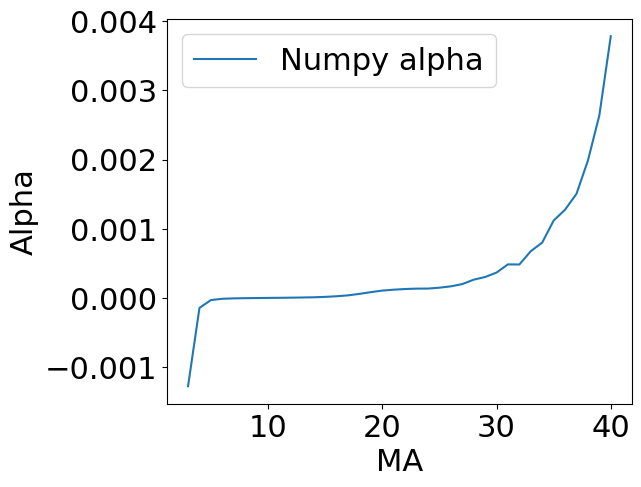

In [14]:
plt.figure(figsize=(6,5))

plt.plot(np.arange(3,41,1), alphas, label="Numpy alpha")

plt.xlabel("MA")
plt.ylabel("Alpha")
plt.legend()

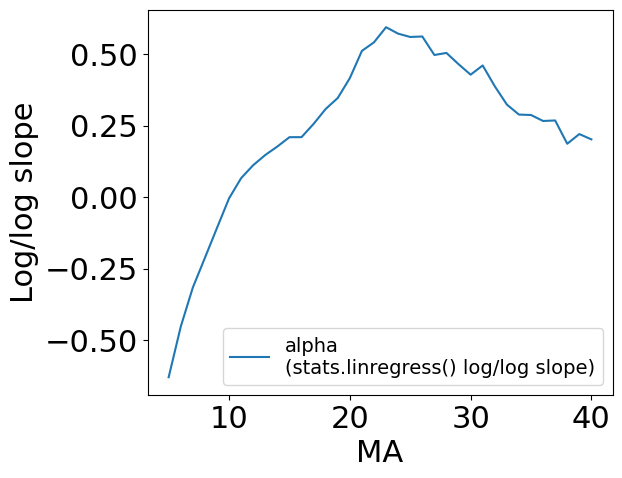

In [191]:
plt.figure(figsize=(6,5))

plt.plot(np.arange(5,41,1), loglog_slopes, label="alpha\n(stats.linregress() log/log slope)")

plt.xlabel("MA")
plt.ylabel("Log/log slope")
plt.legend(prop={"size":14})

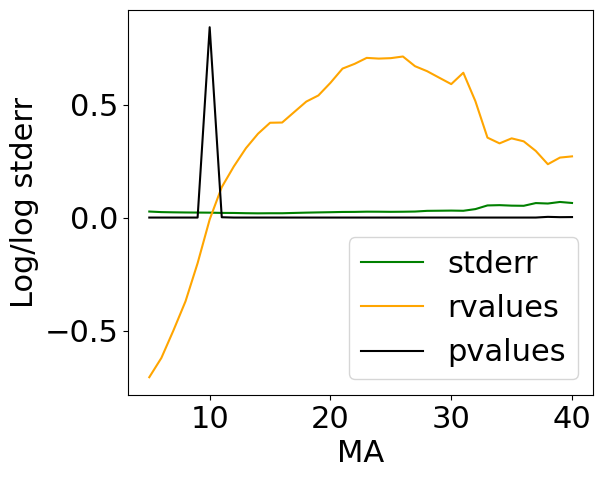

In [81]:
plt.figure(figsize=(6,5))

plt.plot(np.arange(5,41,1), loglog_errors, label="stderr", color="green")
plt.plot(np.arange(5,41,1), loglog_rvalues, label="rvalues", color="orange")
plt.plot(np.arange(5,41,1), loglog_pvalues, label="pvalues", color="black")


plt.xlabel("MA")
plt.ylabel("Log/log stderr")

#plt.yscale("log")

plt.legend()

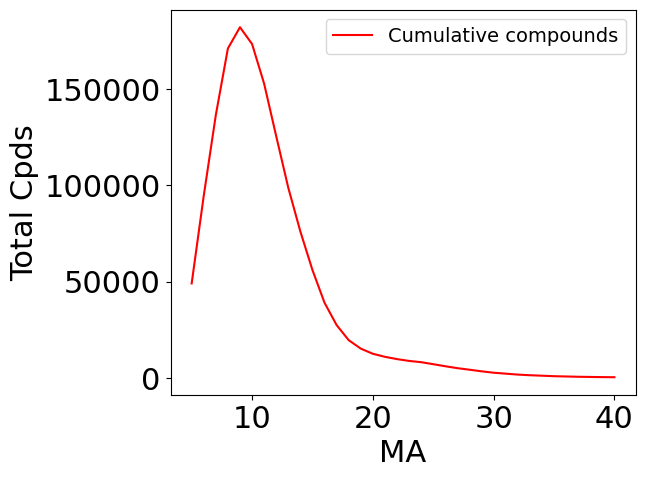

In [90]:
plt.figure(figsize=(6,5))

cum_sums = []
for MA_cpd_pair in total_cpds:
    cum_sums.append(list(MA_cpd_pair.values())[0])

plt.plot(np.arange(5,41,1), cum_sums, label="Cumulative compounds", color="red")

plt.xlabel("MA")
plt.ylabel("Total Cpds")

#plt.yscale("log")

plt.legend(prop={"size":14})

## Quantile Regression testing

Testing Cole's suggestion to fit to quantiles instead of mean - may be less susceptible to outliers

Using this as a guide: https://www.statsmodels.org/devel/examples/notebooks/generated/quantile_regression.html

In [7]:
import statsmodels.formula.api as smf

def quantile_regression(merged_df):
    mod = smf.quantreg("logDeltaMA ~ logCumSum", merged_df)
    res = mod.fit(q=0.5)
    return res
    #print(res.summary())

In [9]:
### Testing with just one value

alphas = []
loglog_slopes = []
loglog_rvalues = []
loglog_pvalues = []
loglog_errors = []
quantile_intercepts = []
quantile_slopes = []
total_cpds = []

for MA_value in tqdm(range(5,41)):
    #Subset MA results by MA value
    sub_df = get_specific_MA_df(MA_df, MA_value)
    sub_df_minus1 = get_specific_MA_df(MA_df, MA_value-1)
    
    #Count number of occurances of MA values within each month & sort dataframe
    sub_df = sub_df.month.value_counts().reset_index(name="MA_Sum")
    sub_df_minus1 = sub_df_minus1.month.value_counts().reset_index(name="MA_Sum")

    sub_df = sub_df.sort_values(by=["index"])
    sub_df_minus1 = sub_df_minus1.sort_values(by=["index"])

    #Count cumulative number of MA values
    sub_df["cumulative_sum"] = sub_df["MA_Sum"].cumsum()
    sub_df_minus1["cumulative_sum"] = sub_df_minus1["MA_Sum"].cumsum()
    sub_df_minus1["logCumSum"] = np.log(sub_df_minus1["cumulative_sum"])

    #Calculate changes in MA (including log), drop na values
    sub_df["deltaMA"] = sub_df['cumulative_sum'] - sub_df['cumulative_sum'].shift(1)
    sub_df["logDeltaMA"] = np.log(sub_df["deltaMA"])

    merged_df = pd.merge(sub_df, sub_df_minus1, on="index")
    merged_df = merged_df.dropna()

    res = quantile_regression(merged_df)

    total_cpds.append({MA_value:merged_df["cumulative_sum_x"].iloc[-1]})

    stats_fit = get_loglog_slope(merged_df)

    loglog_slopes.append(stats_fit[0])
    loglog_rvalues.append(stats_fit[2])
    loglog_pvalues.append(stats_fit[3])
    loglog_errors.append(stats_fit[4])

    # print(res.summary())
    quantile_intercepts.append(res.params["Intercept"])
    quantile_slopes.append(res.params["logCumSum"])


  0%|          | 0/36 [00:00<?, ?it/s]

 14%|█▍        | 5/36 [00:00<00:04,  7.10it/s]/Users/johnmalloy/opt/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
100%|██████████| 36/36 [00:02<00:00, 14.90it/s]


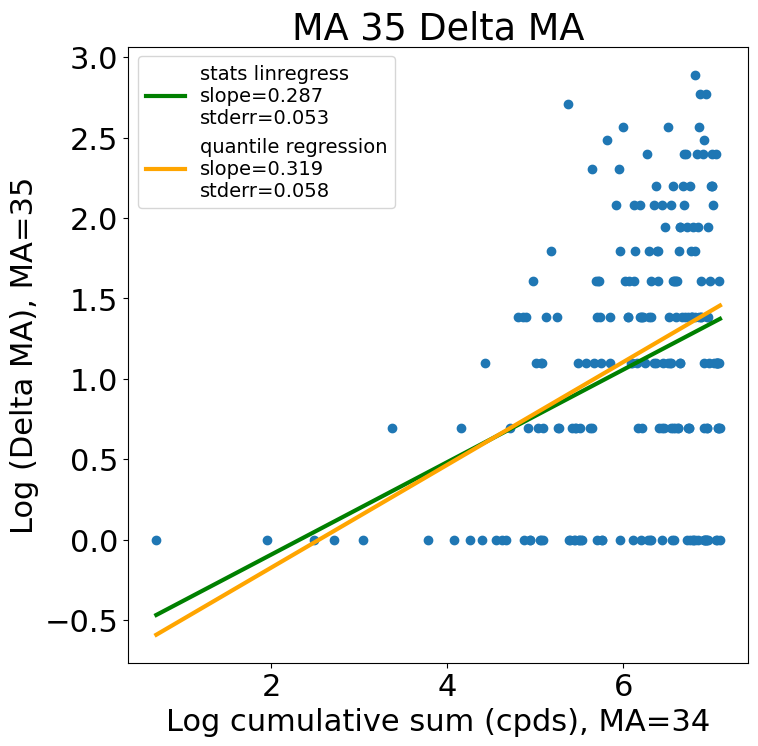

In [250]:
plt.figure(figsize=(8,8))

plt.scatter(merged_df["logCumSum"], merged_df["logDeltaMA"])

plt.plot(merged_df["logCumSum"], stats_fit[1] + merged_df["logCumSum"]*stats_fit[0], 
    color="green", label=f"stats linregress\nslope={round(stats_fit[0],3)}\nstderr={round(stats_fit[4],3)}",
    linewidth=3)

plt.plot(merged_df["logCumSum"], res.params["Intercept"] +  merged_df["logCumSum"]*res.params["logCumSum"],
    color="orange", label="quantile regression\nslope=" + str(round(res.params["logCumSum"],3)) + "\nstderr=0.058",
    linewidth=3)


plt.xlabel("Log cumulative sum (cpds), MA=34")
plt.ylabel("Log (Delta MA), MA=35")
plt.title("MA 35 Delta MA")
plt.legend(prop={"size":14})

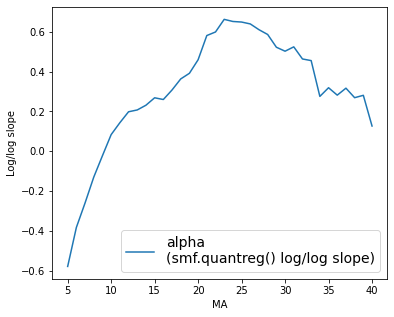

In [10]:
plt.figure(figsize=(6,5))

plt.plot(np.arange(5,41,1), quantile_slopes, label="alpha\n(smf.quantreg() log/log slope)")

plt.xlabel("MA")
plt.ylabel("Log/log slope")
plt.legend(prop={"size":14})

### Selection bias testing

Do selection testing while removing biases:
- sample an equal number of cpds for each MA bin
- filter MAs by time completed (e.g., 60s / 30s / 15s)

First test - equal number of cpds per bin (starting with 1000)

Repeat 100 times

In [186]:
cpd_size = 1000

cpd_bin_loglog_slopes = []
cpd_bin_loglog_rvalues = []
cpd_bin_pvalues = []
cpd_bin_erros = []

In [187]:
for i in tqdm(range(100)):
    alphas = []
    loglog_slopes = []
    loglog_rvalues = []
    loglog_pvalues = []
    loglog_errors = []
    total_cpds = []

    for MA_value in range(5,41):
        #Subset MA results by MA value
        sub_df = get_specific_MA_df(MA_df, MA_value)
        sub_df_minus1 = get_specific_MA_df(MA_df, MA_value-1)

        #Sample cpd_size of each dataframe
        if len(sub_df) > cpd_size:
            sub_df = sub_df.sample(frac=float(cpd_size) / sub_df.size)
        if len(sub_df_minus1) > cpd_size:
            sub_df_minus1 = sub_df_minus1.sample(frac=float(cpd_size) / sub_df.size)
        
        #Count number of occurances of MA values within each month & sort dataframe
        sub_df = sub_df.month.value_counts().reset_index(name="MA_Sum")
        sub_df_minus1 = sub_df_minus1.month.value_counts().reset_index(name="MA_Sum")

        sub_df = sub_df.sort_values(by=["index"])
        sub_df_minus1 = sub_df_minus1.sort_values(by=["index"])


        #Count cumulative number of MA values
        sub_df["cumulative_sum"] = sub_df["MA_Sum"].cumsum()
        sub_df_minus1["cumulative_sum"] = sub_df_minus1["MA_Sum"].cumsum()
        sub_df_minus1["logCumSum"] = np.log(sub_df_minus1["cumulative_sum"])

        #Calculate changes in MA (including log), drop na values
        sub_df["deltaMA"] = sub_df['cumulative_sum'] - sub_df['cumulative_sum'].shift(1)
        sub_df["logDeltaMA"] = np.log(sub_df["deltaMA"])

        merged_df = pd.merge(sub_df, sub_df_minus1, on="index")
        merged_df = merged_df.dropna()

        total_cpds.append({MA_value:merged_df["cumulative_sum_x"].iloc[-1]})


        # alphas.append(get_alpha(merged_df))
        stats_fit = get_loglog_slope(merged_df)

        loglog_slopes.append(stats_fit[0])
        loglog_rvalues.append(stats_fit[2])
        loglog_pvalues.append(stats_fit[3])
        loglog_errors.append(stats_fit[4])

    cpd_bin_loglog_slopes.append(loglog_slopes)
    cpd_bin_loglog_rvalues.append(loglog_rvalues)
    cpd_bin_pvalues.append(loglog_pvalues)
    cpd_bin_erros.append(loglog_errors)



100%|██████████| 100/100 [02:08<00:00,  1.29s/it]


[[-0.17718537380771657, -0.058586449006991705, -0.028400724672316094, -0.1428528740822336, -0.03962209652845757, -0.028659251971765155, -0.05161508873069688, 0.17002697112159518, 0.0787183548687616, 0.10668563927458892, 0.013794954857152684, -0.002990242674844297, 0.07105257123673543, 0.04545604645890437, 0.050821161309542395, 0.1362697081263767, 0.11189661489774037, 0.1887369825281672, 0.14422802238134966, 0.06579369230238723, 0.29858391754974695, 0.19337772970931752, 0.12594104607547102, 0.15731874879639848, 0.058109607315913844, 0.0016748264916465153, 0.14690332197529773, 0.16007383072010856, 0.13248459658778158, 0.15584527760437045, 0.08503413711107718, 0.11920961968877511, 0.10124997962032634, 0.18388675641212626, 0.12334829694366824, 0.31454606599565516], [-0.27007071389607545, 0.005858766397574731, -0.016025577128717307, 0.026515678981001493, 0.09520014015239477, 0.04278115158688182, 0.04709377812155191, 0.0906938877570776, 0.1436947065404324, -0.0014841354420191328, -0.00466966

Text(0.5, 1.0, 'Slopes: Real Value (red) vs \n1000 cpds per bins')

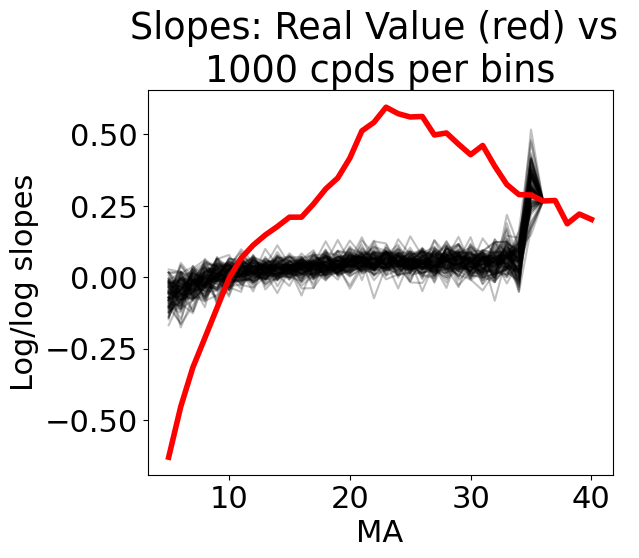

In [192]:
plt.figure(figsize=(6,5))

for loglog_slope in cpd_bin_loglog_slopes:
    plt.plot(np.arange(5,41,1), loglog_slope, alpha=0.25, color="k")

plt.plot(np.arange(5,41,1), loglog_slopes, label="Full Values", color="r", linewidth=4)


plt.xlabel("MA")
plt.ylabel("Log/log slopes")
plt.title(f"Slopes: Real Value (red) vs \n{cpd_size} cpds per bins")
# plt.legend(prop={"size":14})

Text(0.5, 1.0, 'Slopes: Real p-value (blue) vs \n1000 cpds per bins')

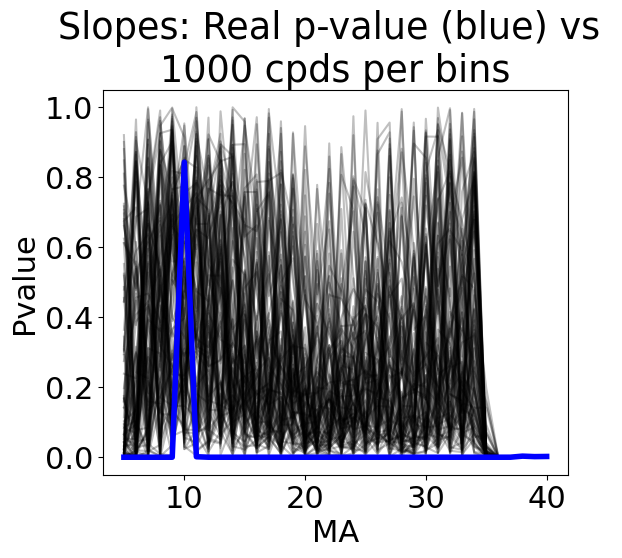

In [193]:
plt.figure(figsize=(6,5))

for pvalue in cpd_bin_pvalues:
    plt.plot(np.arange(5,41,1), pvalue, alpha=0.25, color="k")

plt.plot(np.arange(5,41,1), loglog_pvalues, label="Full pvalue", color="b", linewidth=4)


plt.xlabel("MA")
plt.ylabel("Pvalue")
plt.title(f"Slopes: Real p-value (blue) vs \n{cpd_size} cpds per bins")
# plt.legend(prop={"size":14})

Now for testing out timing (60s, 30s, & 15s)

In [203]:
MA_df_60s = MA_df[MA_df["time"] <= 60]
MA_df_30s = MA_df[MA_df["time"] <= 30]
MA_df_15s = MA_df[MA_df["time"] <= 15]


In [202]:
alphas = []
loglog_slopes_60s = []
loglog_rvalues_60s = []
loglog_pvalues_60s = []
loglog_errors_60s = []
total_cpds_60s = []

for MA_value in tqdm(range(5,41)):
    #Subset MA results by MA value
    sub_df = get_specific_MA_df(MA_df_60s, MA_value)
    sub_df_minus1 = get_specific_MA_df(MA_df_60s, MA_value-1)

    if len(sub_df) > 0 and len(sub_df_minus1) > 0:    
        #Count number of occurances of MA values within each month & sort dataframe
        sub_df = sub_df.month.value_counts().reset_index(name="MA_Sum")
        sub_df_minus1 = sub_df_minus1.month.value_counts().reset_index(name="MA_Sum")

        sub_df = sub_df.sort_values(by=["index"])
        sub_df_minus1 = sub_df_minus1.sort_values(by=["index"])

        #Count cumulative number of MA values
        sub_df["cumulative_sum"] = sub_df["MA_Sum"].cumsum()
        sub_df_minus1["cumulative_sum"] = sub_df_minus1["MA_Sum"].cumsum()
        sub_df_minus1["logCumSum"] = np.log(sub_df_minus1["cumulative_sum"])

        #Calculate changes in MA (including log), drop na values
        sub_df["deltaMA"] = sub_df['cumulative_sum'] - sub_df['cumulative_sum'].shift(1)
        sub_df["logDeltaMA"] = np.log(sub_df["deltaMA"])

        merged_df = pd.merge(sub_df, sub_df_minus1, on="index")
        merged_df = merged_df.dropna()

        if len(merged_df) > 0:
            total_cpds.append({MA_value:merged_df["cumulative_sum_x"].iloc[-1]})

            # alphas.append(get_alpha(merged_df))
            stats_fit = get_loglog_slope(merged_df)

            loglog_slopes_60s.append(stats_fit[0])
            loglog_rvalues_60s.append(stats_fit[2])
            loglog_pvalues_60s.append(stats_fit[3])
            loglog_errors_60s.append(stats_fit[4])
        else:
            loglog_slopes_60s.append(0)
            loglog_rvalues_60s.append(0)
            loglog_pvalues_60s.append(0)
            loglog_errors_60s.append(0)

    else:
        loglog_slopes_60s.append(0)
        loglog_rvalues_60s.append(0)
        loglog_pvalues_60s.append(0)
        loglog_errors_60s.append(0)


100%|██████████| 36/36 [00:01<00:00, 27.83it/s]


In [204]:
alphas = []
loglog_slopes_30s = []
loglog_rvalues_30s = []
loglog_pvalues_30s = []
loglog_errors_30s = []
total_cpds_30s = []

for MA_value in tqdm(range(5,41)):
    #Subset MA results by MA value
    sub_df = get_specific_MA_df(MA_df_30s, MA_value)
    sub_df_minus1 = get_specific_MA_df(MA_df_30s, MA_value-1)

    if len(sub_df) > 0 and len(sub_df_minus1) > 0:    
        #Count number of occurances of MA values within each month & sort dataframe
        sub_df = sub_df.month.value_counts().reset_index(name="MA_Sum")
        sub_df_minus1 = sub_df_minus1.month.value_counts().reset_index(name="MA_Sum")

        sub_df = sub_df.sort_values(by=["index"])
        sub_df_minus1 = sub_df_minus1.sort_values(by=["index"])

        #Count cumulative number of MA values
        sub_df["cumulative_sum"] = sub_df["MA_Sum"].cumsum()
        sub_df_minus1["cumulative_sum"] = sub_df_minus1["MA_Sum"].cumsum()
        sub_df_minus1["logCumSum"] = np.log(sub_df_minus1["cumulative_sum"])

        #Calculate changes in MA (including log), drop na values
        sub_df["deltaMA"] = sub_df['cumulative_sum'] - sub_df['cumulative_sum'].shift(1)
        sub_df["logDeltaMA"] = np.log(sub_df["deltaMA"])

        merged_df = pd.merge(sub_df, sub_df_minus1, on="index")
        merged_df = merged_df.dropna()

        if len(merged_df) > 0:
            total_cpds_30s.append({MA_value:merged_df["cumulative_sum_x"].iloc[-1]})

            # alphas.append(get_alpha(merged_df))
            stats_fit = get_loglog_slope(merged_df)

            loglog_slopes_30s.append(stats_fit[0])
            loglog_rvalues_30s.append(stats_fit[2])
            loglog_pvalues_30s.append(stats_fit[3])
            loglog_errors_30s.append(stats_fit[4])
        else:
            loglog_slopes_30s.append(0)
            loglog_rvalues_30s.append(0)
            loglog_pvalues_30s.append(0)
            loglog_errors_30s.append(0)

    else:
        loglog_slopes_30s.append(0)
        loglog_rvalues_30s.append(0)
        loglog_pvalues_30s.append(0)
        loglog_errors_30s.append(0)


100%|██████████| 36/36 [00:01<00:00, 30.09it/s]


In [205]:
alphas = []
loglog_slopes_15s = []
loglog_rvalues_15s = []
loglog_pvalues_15s = []
loglog_errors_15s = []
total_cpds_15s = []

for MA_value in tqdm(range(5,41)):
    #Subset MA results by MA value
    sub_df = get_specific_MA_df(MA_df_15s, MA_value)
    sub_df_minus1 = get_specific_MA_df(MA_df_15s, MA_value-1)

    if len(sub_df) > 0 and len(sub_df_minus1) > 0:    
        #Count number of occurances of MA values within each month & sort dataframe
        sub_df = sub_df.month.value_counts().reset_index(name="MA_Sum")
        sub_df_minus1 = sub_df_minus1.month.value_counts().reset_index(name="MA_Sum")

        sub_df = sub_df.sort_values(by=["index"])
        sub_df_minus1 = sub_df_minus1.sort_values(by=["index"])

        #Count cumulative number of MA values
        sub_df["cumulative_sum"] = sub_df["MA_Sum"].cumsum()
        sub_df_minus1["cumulative_sum"] = sub_df_minus1["MA_Sum"].cumsum()
        sub_df_minus1["logCumSum"] = np.log(sub_df_minus1["cumulative_sum"])

        #Calculate changes in MA (including log), drop na values
        sub_df["deltaMA"] = sub_df['cumulative_sum'] - sub_df['cumulative_sum'].shift(1)
        sub_df["logDeltaMA"] = np.log(sub_df["deltaMA"])

        merged_df = pd.merge(sub_df, sub_df_minus1, on="index")
        merged_df = merged_df.dropna()

        if len(merged_df) > 0:
            total_cpds_30s.append({MA_value:merged_df["cumulative_sum_x"].iloc[-1]})

            # alphas.append(get_alpha(merged_df))
            stats_fit = get_loglog_slope(merged_df)

            loglog_slopes_15s.append(stats_fit[0])
            loglog_rvalues_15s.append(stats_fit[2])
            loglog_pvalues_15s.append(stats_fit[3])
            loglog_errors_15s.append(stats_fit[4])
        else:
            loglog_slopes_15s.append(0)
            loglog_rvalues_15s.append(0)
            loglog_pvalues_15s.append(0)
            loglog_errors_15s.append(0)

    else:
        loglog_slopes_15s.append(0)
        loglog_rvalues_15s.append(0)
        loglog_pvalues_15s.append(0)
        loglog_errors_15s.append(0)


 53%|█████▎    | 19/36 [00:01<00:00, 29.14it/s]/Users/johnmalloy/opt/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/johnmalloy/opt/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/johnmalloy/opt/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
100%|██████████| 36/36 [00:01<00:00, 30.50it/s]


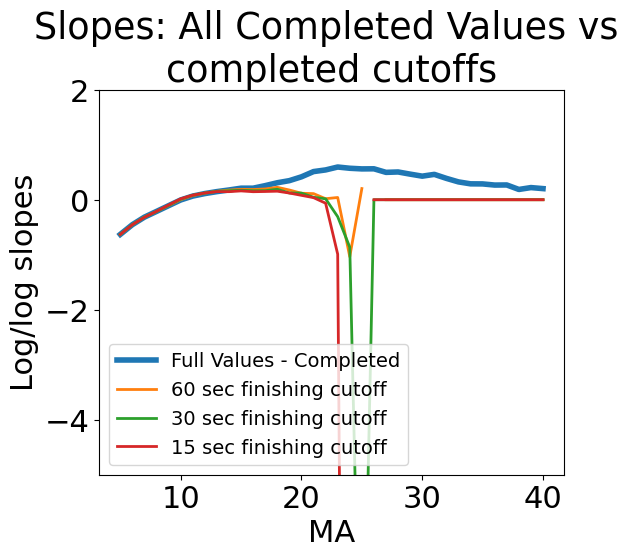

In [211]:
plt.figure(figsize=(6,5))

plt.plot(np.arange(5,41,1), loglog_slopes, label="Full Values - Completed", linewidth=4)
plt.plot(np.arange(5,41,1), loglog_slopes_60s, label="60 sec finishing cutoff", linewidth=2)
plt.plot(np.arange(5,41,1), loglog_slopes_30s, label="30 sec finishing cutoff", linewidth=2)
plt.plot(np.arange(5,41,1), loglog_slopes_15s, label="15 sec finishing cutoff", linewidth=2)


plt.xlabel("MA")
plt.ylabel("Log/log slopes")
plt.title(f"Slopes: All Completed Values vs \ncompleted cutoffs")
plt.ylim([-5,2])
plt.legend(prop={"size":14})